In [2]:
import pandas as pd
import seaborn as sns
import factors_utils as utils

2024-05-12 15:28:43,002 [INFO] numexpr.utils: Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
2024-05-12 15:28:43,004 [INFO] numexpr.utils: Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-05-12 15:28:43,005 [INFO] numexpr.utils: NumExpr defaulting to 8 threads.


In [9]:
factor_list = [
    'LogVol_10Tail_1min',
    'Vol_MaxStd_1min',
    'VCV_Daily_Month',
    'VCV_Daily_Week',
    'Panic_Small_Order_Pct_1min',
    'Market_Unique_1min',
    'Following_Coef_1min',
]

In [10]:
data_dic = {}
for data_name in factor_list:
    data_dic[data_name] = utils.get_feature(data_name, '20190101', '20240401', env='feature_data', output_type='pivot')

In [11]:
def calc_corr(factor1, factor2):
    return data_dic[factor1].corrwith(data_dic[factor2], axis=1).mean()

In [12]:
corrs = pd.DataFrame(index=factor_list, columns=factor_list)
for i in range(len(factor_list)):
    for j in range(i+1, len(factor_list)):
        corrs.iloc[i, j] = calc_corr(factor_list[i], factor_list[j])

In [13]:
for i in range(len(factor_list)):
    for j in range(i+1, len(factor_list)):
        corrs.iloc[j, i] = corrs.iloc[i, j]
corrs

,LogVol_10Tail_1min,Vol_MaxStd_1min,VCV_Daily_Month,VCV_Daily_Week,Panic_Small_Order_Pct_1min,Market_Unique_1min,Following_Coef_1min
LogVol_10Tail_1min,NaN,0.172827,0.020793,0.020514,0.178545,0.441309,0.333699
Vol_MaxStd_1min,0.172827,NaN,0.215812,0.053635,0.152387,0.083485,0.018999
VCV_Daily_Month,0.020793,0.215812,NaN,0.339409,0.35697,0.059928,-0.043476
VCV_Daily_Week,0.020514,0.053635,0.339409,NaN,0.14133,-0.050352,-0.042258
Panic_Small_Order_Pct_1min,0.178545,0.152387,0.35697,0.14133,NaN,0.204581,0.07603
Market_Unique_1min,0.441309,0.083485,0.059928,-0.050352,0.204581,NaN,0.278439
Following_Coef_1min,0.333699,0.018999,-0.043476,-0.042258,0.07603,0.278439,NaN


<AxesSubplot:>

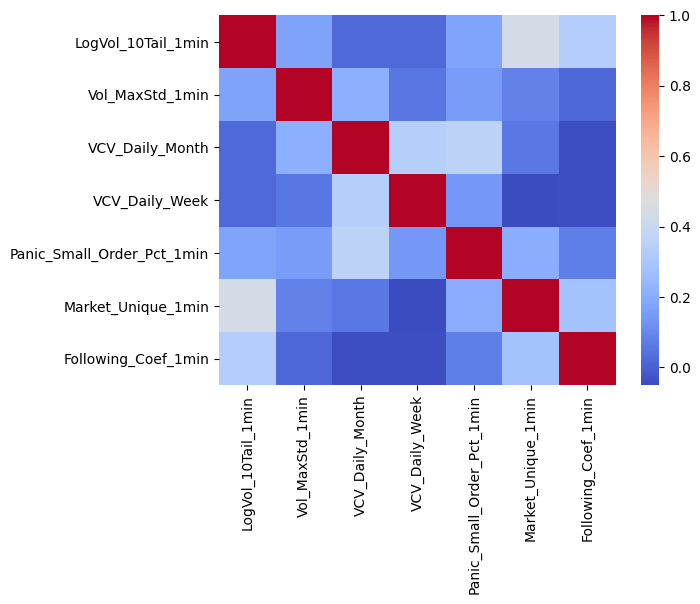

In [14]:
sns.heatmap(corrs.fillna(1.0), cmap='coolwarm')